In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [40]:
train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [41]:
train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [42]:
#get our training labels 
labels = train['label'].values

In [43]:
# View the unique labels. 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<AxesSubplot:ylabel='count'>

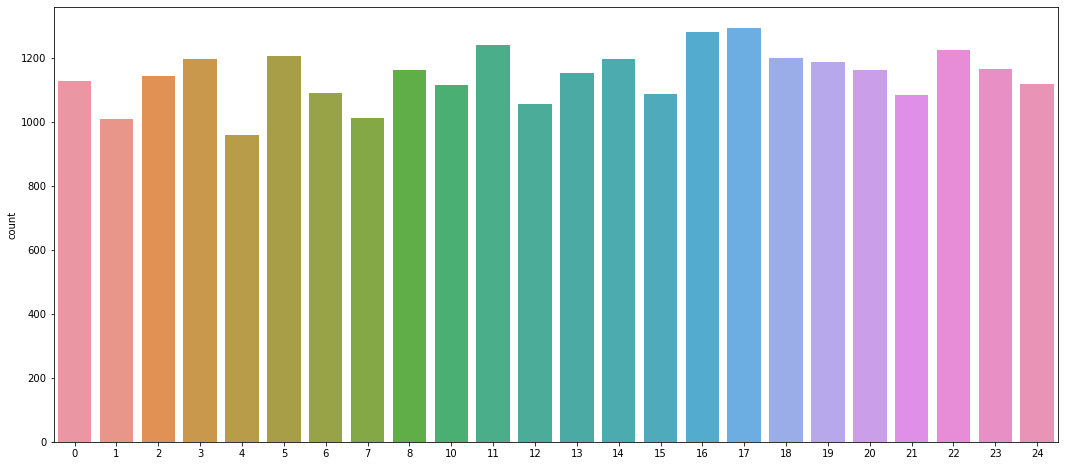

In [44]:
#plot the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [45]:
#Drop Training Labels from our training data so we can seperate it 
train.drop('label',axis = 1, inplace = True)

In [46]:
#extract the image data from each row in our csv, remember it's in a row of 784 columns

images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [47]:
# hot one encode our labels 

from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [48]:
#View our labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


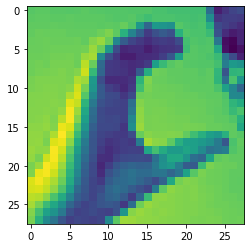

In [49]:
# Inspecing an image 

index = 2

print(labels[index])

plt.imshow(images[index].reshape(28,28))

In [50]:
# Using open cv to view 10 random images
import cv2
import numpy as np



for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()


In [51]:
#split our data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [52]:
#start loding our tensorflow modules and define out batch size ets 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 20


In [53]:
#scale pur images 
x_train = x_train / 255
X_test = x_test / 255

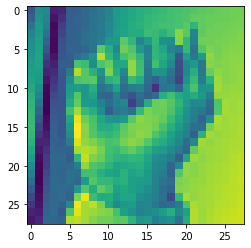

In [76]:
#reshape them into the size required by TF and Keras 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


plt.imshow(x_train[0].reshape(28,28))

In [98]:
# Create our CNN Model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0,20))

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0,20))

model.add(Dense(num_classes, activation = 'softmax'))

In [99]:
# Compile our Model 
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [100]:
print(model.summary())

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_101 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_84 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_102 (Conv2D)         (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_85 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_103 (Conv2D)         (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 1, 1, 64)        

In [102]:
#Train our Model 
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
151/151 [==============================] - 5s 32ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 89.4443 - val_accuracy: 0.8668
Epoch 2/20
151/151 [==============================] - 5s 32ms/step - loss: 0.0752 - accuracy: 0.9761 - val_loss: 32.6092 - val_accuracy: 0.9306
Epoch 3/20
151/151 [==============================] - 5s 31ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 31.9086 - val_accuracy: 0.9342
Epoch 4/20
151/151 [==============================] - 5s 31ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 29.4074 - val_accuracy: 0.9397
Epoch 5/20
151/151 [==============================] - 5s 31ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 31.6463 - val_accuracy: 0.9376
Epoch 6/20
151/151 [==============================] - 5s 31ms/step - loss: 9.0332e-04 - accuracy: 1.0000 - val_loss: 32.4327 - val_accuracy: 0.9393
Epoch 7/20
151/151 [==============================] - 5s 32ms/step - loss: 7.7553e-04 - accuracy: 1.0000 - val_loss: 33.8545 - val_a

In [95]:
# Save our model
model.save("sign_mist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


/home/ujjwal/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


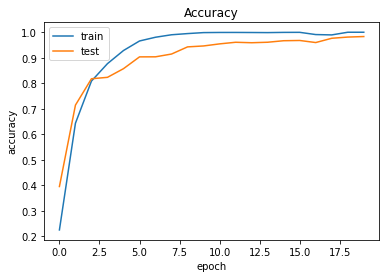

In [96]:
    #View our training history graphically
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Accuracy")
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train','test'])

    plt.show()

In [44]:
# Reshape our test data so that we can evaluate its performance on unseen data 

test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

225/225 [==============================] - 1s 3ms/step


In [45]:
cap = cv2.VideoCapture(0)
# Define a function to map a result to a letter
def getLetter(result):
    # Implement your logic here to map the result to a letter
    # For example, you can use a dictionary or a lookup table
    letter_map = {
        '0': 'A',
        '1': 'B',
        '2': 'C',
        '3': 'D',
        '4': 'E',
        '5': 'F',
        '6': 'G',
        '7': 'H',
        '8': 'I',
        '9': 'K',
        '10': 'L',
        '12': 'M',
        '13': 'N',
        '14': 'O',
        '15': 'P',
        '16': 'Q',
        '17': 'R',
        '18': 'S',
        '19': 'T',
        '20': 'U',
        '21': 'V',
        '22': 'W',
        '23': 'X' }
    
    # Return the mapped letter or a default value if not found
    return letter_map.get(result, 'Unknown')


while True:
    
    ret, frame = cap.read()
    
    frame=cv2.flip(frame, 1)
    
    #define region of intrest 
    
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28,28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    roi = roi.reshape(1,28,28,1)
    
    result = str(model.predict(roi, 1, verbose = 0)[0])
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)
    
    if cv2.waitkey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'waitkey'

In [26]:
# TEST ON ACTUAL WEBCAM

In [ ]:
pip install opencv-python

